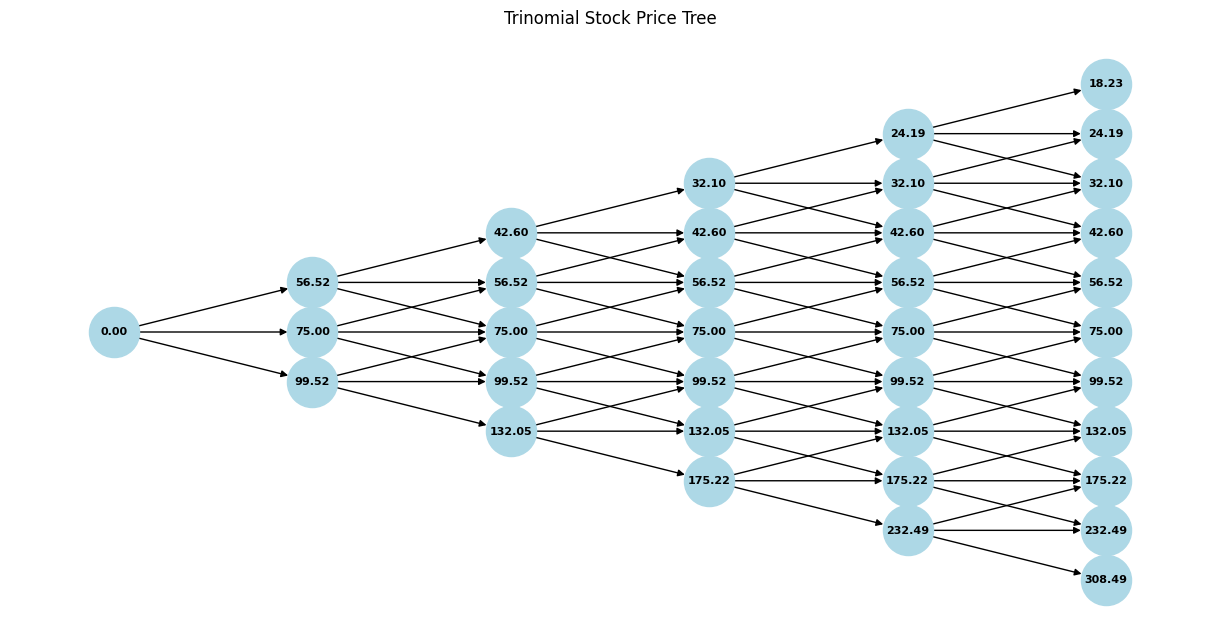

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Function to calculate and plot the trinomial stock price tree
def plot_trinomial_tree(S0, F, T, r, k, coupon, conversion_ratio, N, sigma,):
    dt = T / N  # Time step
    nu = r - q - 0.5 * sigma ** 2  # Drift term

    # Trinomial tree parameters
    u = np.exp(sigma * np.sqrt(2 * dt))  # Up movement
    d = 1 / u  # Down movement
    m = 1  # Middle movement (no movement)

    # Risk-neutral probabilities (not needed for the plot, but calculated for completeness)
    pu = ((np.exp(nu * dt / 2) - d) / (u - d)) ** 2  # Probability of up
    pd = ((u - np.exp(nu * dt / 2)) / (u - d)) ** 2  # Probability of down
    pm = 1 - pu - pd  # Probability of middle (no movement)

    # Create the trinomial stock price tree
    StockPrice = np.zeros((2 * N + 1, N + 1))  # Trinomial tree requires 2N+1 nodes at maturity

    # Set the stock prices at the root (initial stock price)
    StockPrice[N, 0] = S0  # Root of the tree

    # Fill the tree with stock prices
    for j in range(1, N + 1):
        for i in range(2 * j + 1):  # Number of nodes at each step
            StockPrice[i, j] = S0 * (u ** (j - i))  # Fill the tree based on up/middle/down movements

    # Plot the tree using networkx
    G = nx.DiGraph()  # Directed graph for the tree structure
    pos = {}  # Dictionary to hold positions of nodes
    labels = {}  # Dictionary to hold labels (stock prices) for nodes

    # Add nodes and edges to the graph
    for j in range(N + 1):
        for i in range(2 * j + 1):
            node = f"{j},{i}"  # Unique identifier for each node
            G.add_node(node)
            pos[node] = (j, i - j)  # Position for plotting (x, y)
            labels[node] = f"{StockPrice[i, j]:.2f}"  # Label with stock price

            # Add edges between nodes for the trinomial structure
            if j < N:
                G.add_edge(node, f"{j + 1},{i}")  # Down movement
                G.add_edge(node, f"{j + 1},{i + 1}")  # Middle movement
                G.add_edge(node, f"{j + 1},{i + 2}")  # Up movement

    # Plot the tree using networkx
    plt.figure(figsize=(12, 6))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=1300, node_color="lightblue", font_size=8, font_weight="bold", edge_color="black")
    plt.title("Trinomial Stock Price Tree")
    plt.show()

# Parameters
S0 = 75                             # Initial stock price
F = 100                             # Face value of the bond
X = 100                             # Strike price for conversion
T = 5                               # Time to maturity (in years)
r = 0.07                            # Risk-free rate
q = 0
b = r - q
k = 0.03                            # Credit spread
sigma = 0.2                         # Volatility
dt = 1
coupon = 6                          # Coupon payment per year
m = 1                               # Conversion ratio (1 bond = 1 stock)
N = 5                               # Number of time steps
conversion_ratio = F / X            # Conversion ratio

# Plot the trinomial tree for the stock prices
plot_trinomial_tree(S0, F, T, r, k, coupon, conversion_ratio, N, sigma)
